Input data
Simple histogram


array([5.97, 3.  , 2.24, ..., 3.  , 3.  , 3.  ])

array([333.7,  28.2, 322.4, ..., 304.1, 266.1, 288.6])

Plot proper wind rose


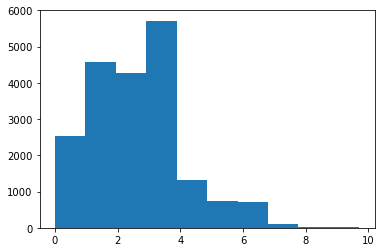

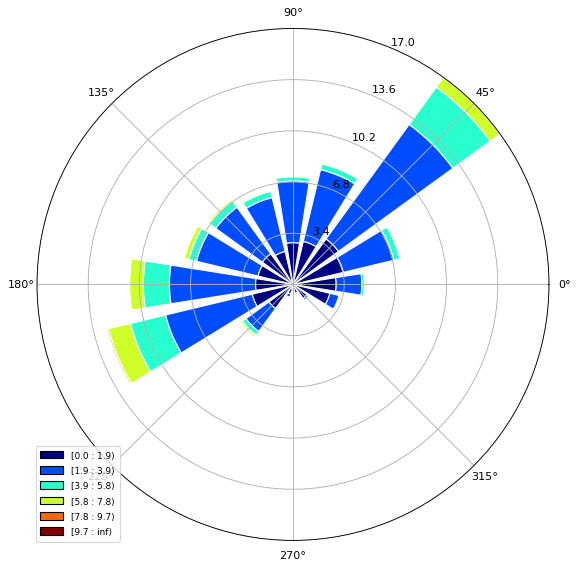

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
rcParams['figure.figsize'] = 8, 6
rcParams['figure.dpi'] = 100
from scipy import stats
from windrose import WindroseAxes


print( "Input data")

np.seterr(divide='ignore', invalid='ignore')

df_ws = pd.read_csv("ws.csv", header=None)
df_wdir = pd.read_csv("wdir.csv", header=None)



data = pd.concat([df_ws, df_wdir], axis=1)
data.columns = ['ws', 'wdir']

ws = data['ws'].to_numpy().flatten()
wdir = data['wdir'].to_numpy().flatten()

print( "Simple histogram")

display(ws, wdir)
plt.hist(ws, color = 'tab:orange')

print( "Plot proper wind rose")

ax = WindroseAxes.from_ax()
ax.bar(wdir, ws, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()


In [18]:

#print( "Attempt to fit with exponweib.fit")
#
## a_in = 1
## loc_in = 0
## a_out, Kappa_out, loc_out, Lambda_out = stats.exponweib.fit(data, f0=a_in,floc=loc_in)
#a_out, Kappa_out, loc_out, Lambda_out = stats.exponweib.fit(data['ws'].to_numpy())
#
#print("a_out:", a_out)
#print("Kappa_out:", Kappa_out)
#print("loc_out:", loc_out)
#print("Lambda_out:", Lambda_out)
#
#np.mean(data['ws'])
#np.median(data['ws'])
#
#
#bins_hist = np.linspace(0, 20, 21)
#bins_cont = np.linspace(0, 20, 81)
#
#
#def fit_and_plot1(column):
#
#    fig = plt.figure()
#    ax = fig.add_subplot(1, 1, 1)
#    #ax.plot(bins_cont, stats.weibull_min.pdf(bins_cont,c=Kappa_out,loc=loc_out,scale = Lambda_out))
#    ax.hist(data['ws'], bins = bins_hist , density=True, alpha=0.5)
#    ax.annotate("Shape: $k = %.2f$ \n Scale: $\lambda = %.2f$"%(Kappa_out,Lambda_out), xy=(0.7, 0.85), xycoords=ax.transAxes)
#
#
#
#    ax.hist(data['ws'], bins=bins_hist, density=True, stacked=True, alpha=0.5)
#
#    yy = stats.exponweib.pdf(bins_cont, a=a_out, c=Kappa_out, loc=loc_out, scale=Lambda_out)
#    xx = bins_cont
#    ax.plot(xx, yy)
#
#    #ax.annotate("Shape: $k = %.2f$ \n Scale: $\lambda = %.2f$" % (Kappa_out, Lambda_out), xy=(0.7, 0.85), xycoords=ax.transAxes)
#    #ax.set_ylabel("Probability")
#    #ax.set_xlabel("Wind velocity [m/s]")
#    #plt.show()
#
#
#
#    ###################################
#    ###################################
#    ###################################
#
#    # Papers to consider
#    # https://www.sciencedirect.com/science/article/pii/S0360132312002776
#    # https://www.sciencedirect.com/science/article/pii/S0360132316300415?via%3Dihub
#
#
#    # Plot Exceedance Probability
#    # https://stackoverflow.com/questions/49244352/exceedance-1-cdf-plot-using-seaborn-and-pandas
#
#
#    #ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
#    #sorted_vals = np.sort(ws, axis=None)
#    #exceedance = 1. - np.arange(1., len(sorted_vals) + 1.) / len(sorted_vals)
#    #ax2.plot(sorted_vals, exceedance)
#
#
#
#
#
#    def prob_exceedance(a_theta, u, k, c):
#        # not in percentage
#        # c = lambda
#        return a_theta * math.exp(-(u / c) ** k)
#
#
#    def a_theta(wind_dir, arr):
#        return len(np.where((arr < wind_dir + 15) | (arr > wind_dir - 15 + 360))[0]) / len(arr)
#
#    velocity = 2
#
#    pe = prob_exceedance(1, velocity, Kappa_out, Lambda_out)
#    print("Probability of Exceedance for", velocity, "m/s: ",  pe)
#
#    ex_manual = []
#    for i in bins_cont:
#        ex_manual.append(prob_exceedance(1, i, Kappa_out, Lambda_out))
#
#
#
#    ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
#    ax2.plot(bins_cont, ex_manual, 'r')
#    ax.set_ylabel("Density")
#    ax2.set_ylabel("POE")
#    ax.set_xlabel("Wind velocity [m/s]")
#    plt.show()
#
#    # https://stackoverflow.com/questions/17481672/fitting-a-weibull-distribution-using-scipy
#    #
#    # from scipy import stats
#    # import matplotlib.pyplot as plt
#    #
#    # #input for pseudo data
#    # N = 10000
#    # Kappa_in = 1.8
#    # Lambda_in = 10
#    # a_in = 1
#    # loc_in = 0
#    #
#    # #Generate data from given input
#    # data = stats.exponweib.rvs(a=a_in,c=Kappa_in, loc=loc_in, scale=Lambda_in, size = N)
#    #
#    # #The a and loc are fixed in the fit since it is standard to assume they are known
#    # a_out, Kappa_out, loc_out, Lambda_out = stats.exponweib.fit(data, f0=a_in,floc=loc_in)
#    #
#    # #Plot
#    # bins = range(51)
#    # fig = plt.figure()
#    # ax = fig.add_subplot(1, 1, 1)
#    # ax.plot(bins, stats.exponweib.pdf(bins, a=a_out,c=Kappa_out,loc=loc_out,scale = Lambda_out))
#    # ax.hist(data, bins = bins , density=True, alpha=0.5)
#    # ax.annotate("Shape: $k = %.2f$ \n Scale: $\lambda = %.2f$"%(Kappa_out,Lambda_out), xy=(0.7, 0.85), xycoords=ax.transAxes)
#    # plt.show()
#
#fit_and_plot1(data['ws'])

Attempt to fit with weibull_min.fit, MATCHES C# library
Probability of Exceedance for 5 m/s:  0.07048471504146428


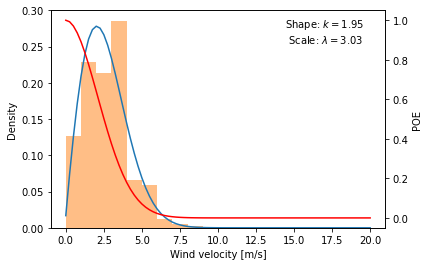

In [17]:

print( """Attempt to fit with weibull_min.fit, MATCHES C# library""")

# c : array_like

# shape parameters

# loc : array_like, optional

# location parameter (default=0)

# scale : array_like, optional

# scale parameter (default=1)

#https://stackoverflow.com/questions/17481672/fitting-a-weibull-distribution-using-scipy""")




#Kappa_in = 1.8 # shape
#Lambda_in = 10 # scale


np.seterr(divide='ignore', invalid='ignore')

df_ws = pd.read_csv("ws.csv", header=None)
df_wdir = pd.read_csv("wdir.csv", header=None)

data = pd.concat([df_ws, df_wdir], axis=1)
data.columns = ['ws', 'wdir']



def fit_and_plot2(column):

    #The a and loc are fixed in the fit since it is standard to assume they are known
    Kappa_out, loc_out,  Lambda_out = stats.weibull_min.fit(column)

    #Plot

    bins_hist = np.linspace(0, 20, 21)
    bins_cont = np.linspace(0, 20, 81)


    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(bins_cont, stats.weibull_min.pdf(bins_cont,c=Kappa_out,loc=loc_out,scale = Lambda_out))
    ax.hist(column, bins = bins_hist , density=True, alpha=0.5)
    ax.annotate("Shape: $k = %.2f$ \n Scale: $\lambda = %.2f$"%(Kappa_out,Lambda_out), xy=(0.7, 0.85), xycoords=ax.transAxes)

    def prob_exceedance(a_theta, u, k, c):
        # not in percentage
        # c = lambda
        return a_theta * math.exp(-(u / c) ** k)

    # https://www.desmos.com/calculator/q5j5jhhit0

    def a_theta(wind_dir, arr):
        return len(np.where((arr < wind_dir + 15) | (arr > wind_dir - 15 + 360))[0]) / len(arr)


    velocity = 2

    pe = prob_exceedance(1, velocity, Kappa_out, Lambda_out)
    print("Probability of Exceedance for", velocity, "m/s: ",  pe)

    ex_manual = []
    for i in bins_cont:
        ex_manual.append(prob_exceedance(1, i, Kappa_out, Lambda_out))

    ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
    ax2.plot(bins_cont, ex_manual, 'r')
    ax.set_ylabel("Density")
    ax2.set_ylabel("POE")
    ax.set_xlabel("Wind velocity [m/s]")
    plt.show()

fit_and_plot2(data['ws'])

In [24]:
### Testing

def ScaleABL( URefEPW,  zref,  z0,  probingHeight):
    import math

    zGround = 0

    Kappa = 0.41


    U_star = Kappa * URefEPW / (math.log((zref + z0) / z0))

    return U_star / Kappa * math.log((probingHeight - zGround + z0) / z0)

print("Scaled ABL velocity")
ScaleABL(4.5815, 2, 1, 10)

Scaled ABL velocity


9.999849178498117